In [1]:
from twitterscraper import query_tweets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'}


In [2]:
import nltk,string,re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Malty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Malty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Malty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
lang='english'

In [4]:
tweets = query_tweets("Tesla3 OR TeslaModel3 OR Model3 OR tesla3 OR model3 OR teslamodel3 OR #tesla OR #Tesla OR #Model3 OR #model3 OR #TeslaModel3 OR #teslamodel3",lang=lang)

INFO: queries: ['Tesla3 OR TeslaModel3 OR Model3 OR tesla3 OR model3 OR teslamodel3 OR #tesla OR #Tesla OR #Model3 OR #model3 OR #TeslaModel3 OR #teslamodel3 since:2006-03-21 until:2006-12-05', 'Tesla3 OR TeslaModel3 OR Model3 OR tesla3 OR model3 OR teslamodel3 OR #tesla OR #Tesla OR #Model3 OR #model3 OR #TeslaModel3 OR #teslamodel3 since:2006-12-05 until:2007-08-21', 'Tesla3 OR TeslaModel3 OR Model3 OR tesla3 OR model3 OR teslamodel3 OR #tesla OR #Tesla OR #Model3 OR #model3 OR #TeslaModel3 OR #teslamodel3 since:2007-08-21 until:2008-05-06', 'Tesla3 OR TeslaModel3 OR Model3 OR tesla3 OR model3 OR teslamodel3 OR #tesla OR #Tesla OR #Model3 OR #model3 OR #TeslaModel3 OR #teslamodel3 since:2008-05-06 until:2009-01-20', 'Tesla3 OR TeslaModel3 OR Model3 OR tesla3 OR model3 OR teslamodel3 OR #tesla OR #Tesla OR #Model3 OR #model3 OR #TeslaModel3 OR #teslamodel3 since:2009-01-20 until:2009-10-06', 'Tesla3 OR TeslaModel3 OR Model3 OR tesla3 OR model3 OR teslamodel3 OR #tesla OR #Tesla OR #Mo

In [5]:
df=pd.DataFrame(t.__dict__ for t in tweets)

In [6]:
df.shape

(14315, 21)

In [7]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,[Tesla],[],False,True,0,[],796632634,0,"[{'screen_name': 'melissa', 'user_id': '140190...",...,mcmurrak,@girk I'm working on that one. I think #Tesla ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2008-04-25 10:44:41,1209120281,796632857,/mcmurrak/status/796632857,662683,Kirk McMurray,
1,False,"[sxsw, sxswi, eff, tesla]",[],False,False,0,[],,0,[],...,cookiecrook,does anyone know if the plutopia/eff singing t...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2008-03-10 20:29:48,1205180988,769487793,/cookiecrook/status/769487793,33233,James Craig,
2,False,[Tesla],[],False,True,0,[],709507532,0,"[{'screen_name': 't_koeppen', 'user_id': '6159...",...,briansolis,Thx to @djsiry for bringing the #Tesla last ni...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2008-02-14 14:15:57,1202998557,711618002,/briansolis/status/711618002,11489,Brian Solis,
3,False,[],[],False,False,0,[],,0,[],...,XYRS,2000は変更点は使用基板変更(MODEL3→NAOMI)と機体3体追加、VM対応化、ゲーム...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2007-11-24 10:29:16,1195900156,439716052,/XYRS/status/439716052,10075632,XYRS,
4,False,[Tesla],[],False,True,0,[],796632634,0,"[{'screen_name': 'melissa', 'user_id': '140190...",...,mcmurrak,@girk I'm working on that one. I think #Tesla ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2008-04-25 10:44:41,1209120281,796632857,/mcmurrak/status/796632857,662683,Kirk McMurray,


In [8]:
df.isnull().sum()

has_media           0
hashtags            0
img_urls            0
is_replied          0
is_reply_to         0
likes               0
links               0
parent_tweet_id     0
replies             0
reply_to_users      0
retweets            0
screen_name         0
text                0
text_html           0
timestamp           0
timestamp_epochs    0
tweet_id            0
tweet_url           0
user_id             0
username            0
video_url           0
dtype: int64

In [9]:
#Before processing
print("Before processing")
print(df['text'][0])

Before processing
@girk I'm working on that one. I think #Tesla was close... ;)


In [10]:
#tokenize tweets to sentences
df['text'] = df['text'].apply(lambda x: nltk.sent_tokenize(x))

In [11]:
#tokenize sentences to words
df['text'] = df['text'].apply(lambda x: [nltk.word_tokenize(sent) for sent in x])

In [12]:
#change all the words to lower case
df['text'] = df['text'].apply(lambda x : [[wrd.lower() for wrd in sent] for sent in x])

In [13]:
#remove all the white spaces
df['text'] = df['text'].apply(lambda x: [[wrd.strip() for wrd in sent if wrd!=' '] for sent in x])

In [14]:
#removing the stop words
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [[wrd for wrd in sent if not wrd in stop_words] for sent in x])

In [15]:
#removing punctuation marks 
punct = str.maketrans('','',string.punctuation)
df['text'] = df['text'].apply(lambda x: [[wrd.translate(punct) for wrd in sent] for sent in x])

In [16]:
#removing non alphabetic characters
df['text'] = df['text'].apply(lambda x: [[wrd for wrd in sent if wrd.isalpha()] for sent in x])

In [17]:
#lemmatization 
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [[lemmatizer.lemmatize(wrd.strip()) for wrd in sent] for sent in x])

In [18]:
#removing single characters
df['text'] = df['text'].apply(lambda x: [[wrd for wrd in sent if len(wrd)>2] for sent in x])

In [19]:
#reformatting the text column to single text and not nested lists
df['text'] = df['text'].apply(lambda x: [' '.join(wrd) for wrd in x])
df['text'] = df['text'].apply(lambda x:' '.join(x))

In [20]:
#after processing
print(df['text'][0])

girk working one think tesla close


In [21]:
#TF IDF for text column
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_text = tfidf_vectorizer.fit_transform(df['text'])

In [22]:
#TF IDF o/p vectors
from sklearn.decomposition import PCA
tfidf_pca = PCA(n_components = 2)
tfidf_pca_comp = tfidf_pca.fit_transform(tfidf_text.toarray())

In [23]:
tfidf_pca_comp.shape

(14315, 2)

In [24]:
clusters=[]
kmeans_scores=[]

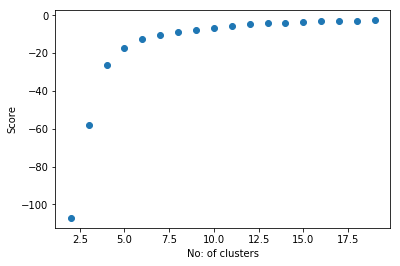

In [25]:
from sklearn.cluster import KMeans
K=range(2,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(tfidf_pca_comp)
    kmeans_scores.append(k_means.score(tfidf_pca_comp))
    clusters.append(k)
plt.scatter(clusters,kmeans_scores)
plt.title("Elbow method to find value of k")
plt.xlabel("No: of clusters")
plt.ylabel("Score")
plt.show()

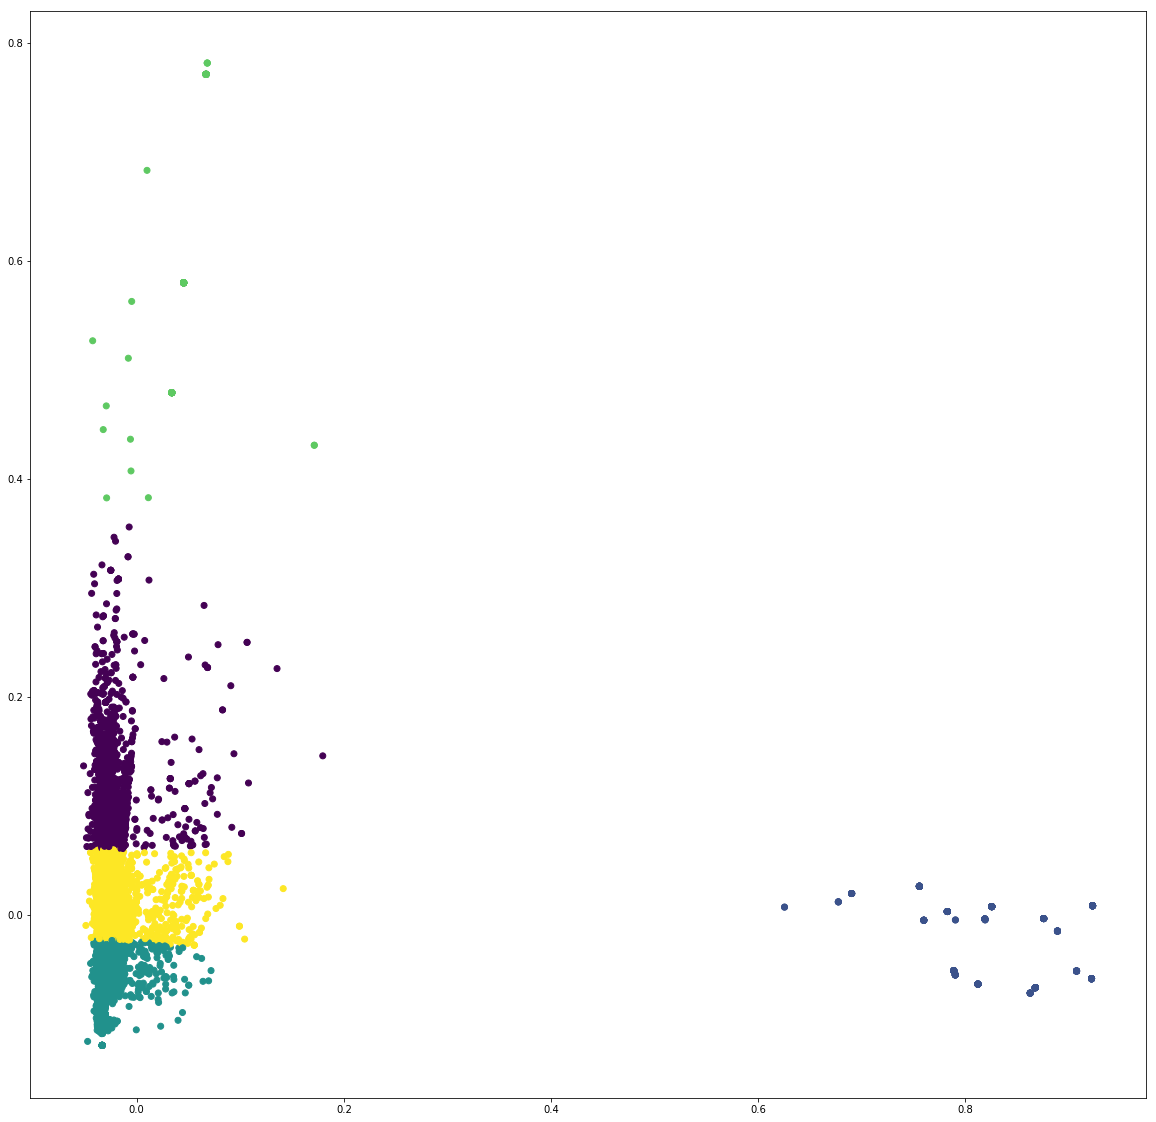

In [26]:
k_means=KMeans(n_clusters=5)
k_means.fit(tfidf_pca_comp)
pred=k_means.predict(tfidf_pca_comp)
plt.figure(figsize=(20,20))
plt.scatter(tfidf_pca_comp[:,0],tfidf_pca_comp[:,1],c=pred)
plt.show()

In [27]:
df['tfidf']=tfidf_text
df['tfidf_clusters']=pred
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,tfidf,tfidf_clusters
0,False,[Tesla],[],False,True,0,[],796632634,0,"[{'screen_name': 'melissa', 'user_id': '140190...",...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2008-04-25 10:44:41,1209120281,796632857,/mcmurrak/status/796632857,662683,Kirk McMurray,,"(0, 8896)\t0.6162532859899589\n (0, 23905)\...",2
1,False,"[sxsw, sxswi, eff, tesla]",[],False,False,0,[],,0,[],...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2008-03-10 20:29:48,1205180988,769487793,/cookiecrook/status/769487793,33233,James Craig,,"(0, 8896)\t0.6162532859899589\n (0, 23905)\...",2
2,False,[Tesla],[],False,True,0,[],709507532,0,"[{'screen_name': 't_koeppen', 'user_id': '6159...",...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2008-02-14 14:15:57,1202998557,711618002,/briansolis/status/711618002,11489,Brian Solis,,"(0, 8896)\t0.6162532859899589\n (0, 23905)\...",4
3,False,[],[],False,False,0,[],,0,[],...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2007-11-24 10:29:16,1195900156,439716052,/XYRS/status/439716052,10075632,XYRS,,"(0, 8896)\t0.6162532859899589\n (0, 23905)\...",2
4,False,[Tesla],[],False,True,0,[],796632634,0,"[{'screen_name': 'melissa', 'user_id': '140190...",...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2008-04-25 10:44:41,1209120281,796632857,/mcmurrak/status/796632857,662683,Kirk McMurray,,"(0, 8896)\t0.6162532859899589\n (0, 23905)\...",2


In [28]:
top_tf_idf_df = pd.DataFrame(tfidf_text.todense()).groupby(df['tfidf_clusters']).mean()

In [29]:
top_tf_idf_df

,0,1,2,3,4,5,6,7,8,9,...,25974,25975,25976,25977,25978,25979,25980,25981,25982,25983
tfidf_clusters,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000098,0.000042,0.000000,0.000111,0.000000,0.000529,0.000113,0.000109,0.000046,0.000052,...,0.000133,0.000000,0.000127,0.000537,0.000127,0.000167,0.000000,0.000000,0.000000,0.000118
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000083,0.000000,0.000126,0.000135,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000166,0.000000,0.000661,0.000000,0.000000,0.000166,0.000166,0.000166,0.000000


In [30]:
for i,r in top_tf_idf_df.iterrows():
    print("\nCluster {}".format(i))
    print(','.join([tfidf_vectorizer.get_feature_names()[t] for t in np.argsort(r)[-25:]]))


Cluster 0
say,time,musk,teslamotors,tsla,video,future,using,auto,drive,hardware,summon,roadster,applewatch,new,motor,apple,teslamodelsforum,selfdriving,watch,electric,model,http,car,tesla

Cluster 1
gefahren,via,new,independent,connect,mindfortune,get,tech,gain,continuing,energy,independence,http,tesla,join,access,patent,topsecret,diy,forum,video,support,community,alternativeenergy,blueprint

Cluster 2
first,via,great,today,see,would,teslamotors,think,time,que,day,love,new,get,spacex,like,musk,elon,nustolympiad,tsla,one,edison,elonmusk,http,tesla

Cluster 3
gefährlich,gehen,gehad,geil,geinus,gegner,gegevens,gegenüber,gegenzug,gegen,gegeben,gefühl,gejubel,gekauft,gehören,gehört,know,selling,motor,video,electric,car,model,http,tesla

Cluster 4
news,get,power,first,bbc,bitlybhmkti,one,elon,roadster,motor,battery,musk,bitlybihewv,tsla,elonmusk,teslamotors,google,electric,via,new,model,droid,car,http,tesla


In [35]:
for i,r in top_tf_idf_df.iterrows():
    print("\nCluster {}".format(i))
    print(','.join([tfidf_vectorizer.get_feature_names()[t] for t in np.argsort(r)[-10:]]))


Cluster 0
motor,apple,teslamodelsforum,selfdriving,watch,electric,model,http,car,tesla

Cluster 1
access,patent,topsecret,diy,forum,video,support,community,alternativeenergy,blueprint

Cluster 2
like,musk,elon,nustolympiad,tsla,one,edison,elonmusk,http,tesla

Cluster 3
gehört,know,selling,motor,video,electric,car,model,http,tesla

Cluster 4
teslamotors,google,electric,via,new,model,droid,car,http,tesla
